In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
df = pd.read_csv(r"C:\Programming\Python\Industry Level Projects\Django E-t-E Project\myproject\bank_datasets\bank.csv")

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [219]:
# Create feature (X) and target (y) datasets
X = df.drop('deposit', axis=1)
y = df['deposit']

# Rename columns for clarity
X.rename(columns={
    'default' : 'credit_on_default',
    'balance' : 'annual_balance',
    'housing' : 'housing_loan',
    'loan': 'personal_loan',
    'contact' : 'contact_type',
    'day' : 'contact_day',
    'month' : 'contact_month',
    'duration' : 'contact_duration',
    'campaign' : 'campaign_contacts',
    'pdays' : 'days_last_contacted',
    'previous' : "previous_contacts"
}, inplace=True)

# Replace binary values with 1s and 0s
y.replace({'yes':1, 'no':0}, inplace=True)
to_replace = ['marital', 'credit_on_default', 'housing_loan', 'personal_loan', 'poutcome']

for col in to_replace:
    X[col].replace({'yes':1, 'no':0, 'unknown':0, 'other':0, 'failure':0, 'success':1, 'married':1, 'divorced':0, 'single':0}, inplace=True)

C:\Users\LESEGO\AppData\Local\Temp\ipykernel_12680\3770997396.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace({'yes':1, 'no':0}, inplace=True)
C:\Users\LESEGO\AppData\Local\Temp\ipykernel_12680\3770997396.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].replace({'yes':1, 'n

In [220]:
X['deposit'] = y  # Add y for grouping
job_group = X.groupby(by=X['deposit'])  # Group X by target variable
jobs_with_most_subs = job_group['job'].value_counts()[1][:5]  # Get top 5 jobs with the most subsciptions

print(f"Jobs with the most subscriptions are: {jobs_with_most_subs}")

X.drop('deposit', axis=1, inplace=True)

Jobs with the most subscriptions are: job
management     1301
technician      840
blue-collar     708
admin.          631
retired         516
Name: count, dtype: int64


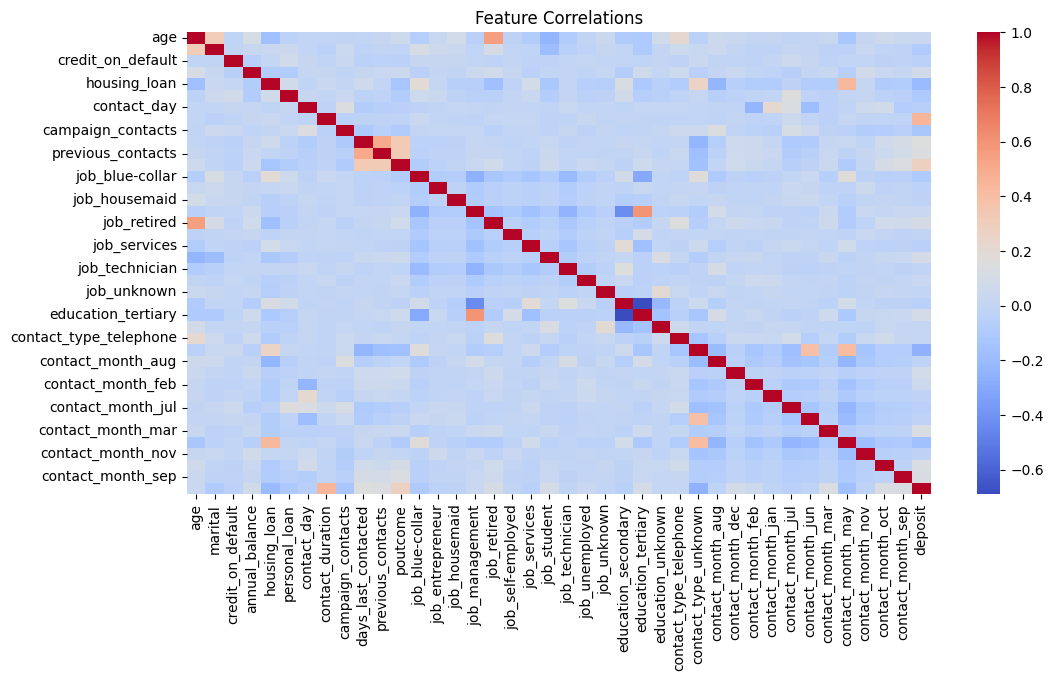

In [221]:
X = pd.get_dummies(X, drop_first=True)  # One hot encode feature values

# Create correlation map
corr_map = X
corr_map['deposit'] = y  # Add deposit to corr map to compare feature correlations
corr_map = X.corr()

# Plot heatmap of X data
plt.figure(figsize=(12, 6))
sns.heatmap(corr_map, annot=False, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

In [222]:
sorted_corrs = corr_map['deposit'].sort_values(ascending=False)  # Sort correlations to target in descending order

# Get top 3 highest and lowest correlations to target
top_feature_corrs = sorted_corrs[1:4]
least_feature_corrs = sorted_corrs[-3:]

# Convert into list
top_feature_corrs = list(top_feature_corrs.index)
least_feature_corrs = list(least_feature_corrs.index)

print(f"Top 3 highest correlations to target: {top_feature_corrs}\n")
print(f"Top 3 lowest correlations to target: {least_feature_corrs}\n")

X.drop('deposit', axis=1, inplace=True)  # Remove target variable from X

Top 3 highest correlations to target: ['contact_duration', 'poutcome', 'days_last_contacted']

Top 3 lowest correlations to target: ['contact_month_may', 'housing_loan', 'contact_type_unknown']



In [223]:
# Upload processed data into csv files

X.to_csv(r'C:\Programming\Python\Industry Level Projects\Django E-t-E Project\myproject\notebooks\features.csv', index=False)
y.to_csv(r'C:\Programming\Python\Industry Level Projects\Django E-t-E Project\myproject\notebooks\target.csv', index=False)